<a href="https://colab.research.google.com/github/Pimchanokz/ML/blob/main/Lab2_3_SVR_TwinkleMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 2 - PART 2 SVR**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader as web
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### **Retrieve the Financial Data**
Historical stock prices for a set of stocks, foreign exchange rates, and key market indices.

Ticker:
- stock tickers : `stk_tickers = ['MSFT', 'IBM', 'GOOGL']`
- foreign exchange tickers : `ccy_tickers = ['DEXJPUS', 'DEXUSUK']`
- market index tickers : `idx_tickers = ['SP500', 'DJIA', 'VIXCLS']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `yf.download()`
- `web.DataReader()`
</details>

In [ ]:
### START CODE HERE ###
stk_tickers = ['MSFT', 'IBM', 'GOOGL'] #ราคาใกล้ปิด (Adj close) ของหุ้นกลุ่ม Technology 3 ตัว
ccy_tickers = ['DEXJPUS', 'DEXUSUK'] #อัตราแลกเปลี่ยนสกุลเงิน
idx_tickers = ['SP500', 'DJIA', 'VIXCLS'] #ค่าดัชนีตลาดหุ้น

stk_data = yf.download(stk_tickers,start='2018-12-31', end='2023-12-31') #ดึงข้อมูลจาก Yahoo Finance ในช่วงวัน '2018-12-31' ถึง วันปัจจุบัน
ccy_data = web.DataReader(ccy_tickers, 'fred',start='2018-12-31', end='2023-12-31') #ดึงข้อมูลจากฐานข้อมูล fred
idx_data = web.DataReader(idx_tickers, 'fred',start='2018-12-31', end='2023-12-31')
### END CODE HERE ###

[*********************100%%**********************]  3 of 3 completed


### **Exploring the Data**

In [ ]:
cls_msft = pd.DataFrame(stk_data['Adj Close','MSFT'])
standard_scaler = preprocessing.StandardScaler()
stk_data = pd.DataFrame(standard_scaler.fit_transform(stk_data),columns=stk_data.columns,index=stk_data.index)
stk_data

Price      Adj Close                         Close                      \
Ticker         GOOGL       IBM      MSFT     GOOGL       IBM      MSFT   
Date                                                                     
2018-12-31 -1.545902 -1.988830 -1.839674 -1.545902 -1.980483 -1.858099   
2019-01-02 -1.529536 -1.914432 -1.845488 -1.529536 -1.845540 -1.864312   
2019-01-03 -1.578717 -2.025547 -1.893550 -1.578717 -2.047078 -1.915671   
2019-01-04 -1.490155 -1.812495 -1.835023 -1.490155 -1.660651 -1.853128   
2019-01-07 -1.493775 -1.772395 -1.833343 -1.493775 -1.587922 -1.851334   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  1.459192  2.976621  1.944472  1.459192  2.920259  1.911174   
2023-12-26  1.460202  3.045630  1.945561  1.460202  3.018331  1.912279   
2023-12-27  1.421477  3.061753  1.937534  1.421477  3.041245  1.904133   
2023-12-28  1.416763  3.080456  1.953997  1.416763  3.067825  1.920838   
2023-12-29  1.398579  3.067557  1.964337  1.398579  3.049494  1.931331   

Price           High                           Low                      \
Ticker         GOOGL       IBM      MSFT     GOOGL       IBM      MSFT   
Date                                                                     
2018-12-31 -1.534956 -2.052242 -1.863116 -1.543344 -1.962274 -1.855258   
2019-01-02 -1.538621 -1.907275 -1.872014 -1.556538 -2.025546 -1.876163   
2019-01-03 -1.529508 -2.005105 -1.893369 -1.561486 -1.938872 -1.900414   
2019-01-04 -1.506616 -1.772981 -1.861610 -1.536849 -1.787191 -1.876303   
2019-01-07 -1.502118 -1.653805 -1.851206 -1.493016 -1.593907 -1.847732   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  1.425277  2.886491  1.870979  1.485080  2.890288  1.939392   
2023-12-26  1.448268  2.970216  1.895072  1.501403  2.985483  1.950402   
2023-12-27  1.428276  3.000915  1.869336  1.457196  3.042599  1.940785   
2023-12-28  1.396954  3.030685  1.888501  1.452435  3.107876  1.959601   
2023-12-29  1.370964  3.051150  1.898084  1.419450  3.056199  1.950123   

Price           Open                        Volume                      
Ticker         GOOGL       IBM      MSFT     GOOGL       IBM      MSFT  
Date                                                                    
2018-12-31 -1.520491 -2.011721 -1.860543 -0.036037  0.084947  0.302208  
2019-01-02 -1.572009 -2.127725 -1.884566 -0.118971 -0.171569  0.476698  
2019-01-03 -1.532534 -1.906263 -1.876972  0.554919 -0.134692  1.063575  
2019-01-04 -1.546174 -1.872868 -1.882219  0.826158 -0.089425  1.183504  
2019-01-07 -1.481571 -1.645255 -1.855711  0.921245 -0.340312  0.503152  
...              ...       ...       ...       ...       ...       ...  
2023-12-22  1.435619  2.837637  1.900053 -0.476443 -0.830173 -0.999700  
2023-12-26  1.463203  2.941511  1.918277 -1.126448 -1.050486 -1.357341  
2023-12-27  1.463203  3.025162  1.900192 -0.936253 -0.567806 -1.176635  
2023-12-28  1.435956  3.100540  1.923385 -1.175500 -0.951817 -1.223457  
2023-12-29  1.397271  3.081236  1.932083 -0.996444 -0.801850 -0.867597  

[1259 rows x 18 columns]

In [ ]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2018-12-31,109.70,1.2763
2019-01-01,NaN,NaN
2019-01-02,109.22,1.2598
2019-01-03,108.07,1.2633
2019-01-04,108.29,1.2740
...,...,...
2023-12-25,NaN,NaN
2023-12-26,142.48,1.2709
2023-12-27,142.05,1.2797


In [ ]:
idx_data


,SP500,DJIA,VIXCLS
DATE,,,
2018-12-31,2506.85,23327.46,25.42
2019-01-01,NaN,NaN,NaN
2019-01-02,2510.03,23346.24,23.22
2019-01-03,2447.89,22686.22,25.45
2019-01-04,2531.94,23433.16,21.38
...,...,...,...
2023-12-25,NaN,NaN,NaN
2023-12-26,4774.75,37545.33,12.99
2023-12-27,4781.58,37656.52,12.43


Let's
- `base` be stk_data's `'Adj Close'` and `'MSFT'`<br>
- `X1` be `stk_data`'s `'Adj Close'` and `('GOOGL','IBM')`<br>
- `X2` be `ccy_data`<br>
- `X3` be `idx_data`


In [ ]:
### START CODE HERE ###
base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))] #ดูค่าที่น่าจะมีผลกับราคาหุ้นไมโครซอฟ
X2 = ccy_data
X3 = idx_data

### END CODE HERE ###

Create lagged and differenced features for time series analysis<br>
- `Y` : difference price of `'Adj Close', 'MSFT'` for past `n` days.
- `X4_[k]DT` : difference price of `'Adj Close', 'MSFT'` for past or next `[k]*n` days. Please select 3 values for `k`.
Concatenate the resulting features `X4_[k[0]]DT`, `X4_[k[1]]DT`, `X4_[k[2]]DT` into a single feature set `X4`. Finally, standardize the values in `X4`.<br>
(See detail explanation in lab direction)


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.diff()`
- `.shift()`
</details>

In [ ]:
### START CODE HERE ###
return_period = 3
k = [3,6,12]

Y = base.shift(-return_period) #ทายค่า Y จากค่าล่วงหน้าในอดีต

### Choose calculation of difference price either past (Guide#1) or next (Guide#2)

### Guide#1 for using price of past [k]*n days //Past Price
X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(k[0]*return_period).values.flatten()},index=base.index)
X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(k[1]*return_period).values.flatten()},index=base.index)
X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(k[2]*return_period).values.flatten()},index=base.index)

X4 = pd.concat([X4_3DT, X4_6DT, X4_12DT], axis=1)
Y
### END CODE HERE ###

Date
2018-12-31   -1.835023
2019-01-02   -1.833343
2019-01-03   -1.823783
2019-01-04   -1.804790
2019-01-07   -1.813446
                ...   
2023-12-22    1.953997
2023-12-26    1.964337
2023-12-27         NaN
2023-12-28         NaN
2023-12-29         NaN
Name: (Adj Close, MSFT), Length: 1259, dtype: float64

**Standardize `X1-4`**

***NOTE:*** Please ensure that each of ***X1-4's index columns*** is the ***date column***.

In [ ]:
### START CODE HERE ###

# standard_scaler = preprocessing.StandardScaler().fit(stk_data)
# X1 = X1_standardized = pd.DataFrame(standard_scaler.fit_transform(X1), columns=X1.columns, index=X1.index)
X2 = X2_standardized = pd.DataFrame(standard_scaler.fit_transform(X2), columns=X2.columns, index=X2.index)
X3 = X3_standardized = pd.DataFrame(standard_scaler.fit_transform(X3), columns=X3.columns, index=X3.index)
# X4 = X4_standardized = pd.DataFrame(standard_scaler.fit_transform(X4), columns=X4.columns, index=X4.index)

### END CODE HERE ###

Concatenate `X1-4` to `X` by index. Then concatenate `X` and `Y` to `dataset` by index.

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.

In [ ]:
### START CODE HERE ###
X = pd.concat([X1,X2_standardized,X3_standardized,X4], axis=1)
dataset = pd.concat([X, Y], axis=1)

### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

| Date       | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|------------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| 2018-12-31 | -1.545378          | -1.993072         | -0.652377 | -0.107177 | -1.966763| -1.936393| 0.492393 | 0.455826 | 3.333092 | 9.376259  | 96.792442         |
| 2019-01-01 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2019-01-02 | -1.529007          | -1.918422         | -0.684528 | -0.3554   | -1.961748| -1.931557| 0.224562 | 3.693924 | 1.728264 | 10.394836 | 96.915886         |
| 2019-01-03 | -1.578206          | -2.029912         | -0.761557 | -0.302747 | -2.05974 | -2.10151 | 0.496045 | 7.577789 | 8.52739  | 14.661652 | 97.618576         |
| 2019-01-04 | -1.48961           | -1.816142         | -0.746821 | -0.141777 | -1.927197| -1.909175| 0.000558 | 3.978821 | 2.373985 | 10.178764 | 99.014511         |
| ...        | ...                | ...               | ...       | ...       | ...      | ...      | ...      | ...      | ...      | ...       | ...               |
| 2023-12-22 | 1.46086            | 2.989076          | 1.551328  | -0.171865 | 1.577892 | 1.683629 | -1.015981| NaN      | NaN      | NaN       | 375.279999        |
| 2023-12-25 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2023-12-26 | 1.46187            | 3.058317          | NaN       | NaN       | 1.60962  | 1.724664 | -1.020851| NaN      | NaN      | NaN       | NaN               |
| 2023-12-27 | 1.42313            | 3.074495          | NaN       | NaN       | 1.620391 | 1.753295 | -1.089026| NaN      | NaN      | NaN       | NaN               |
| 2023-12-28 | 1.418414           | 3.09326           | NaN       | NaN       | 1.623182 | 1.767092 | NaN      | NaN      | NaN      | NaN       | NaN               |

</details>

In [ ]:
dataset

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,"(Adj Close, MSFT)"
2018-12-31,-1.545902,-1.988830,-0.655877,-0.106929,-1.966814,-1.936177,0.494033,NaN,NaN,NaN,-1.835023
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,-1.529536,-1.914432,-0.687966,-0.355544,-1.961803,-1.931345,0.226239,NaN,NaN,NaN,-1.833343
2019-01-03,-1.578717,-2.025547,-0.764847,-0.302807,-2.059734,-2.101157,0.497684,NaN,NaN,NaN,-1.823783
2019-01-04,-1.490155,-1.812495,-0.750139,-0.141584,-1.927273,-1.908982,0.002266,NaN,NaN,NaN,-1.804790
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-26,1.460202,3.045630,1.535564,-0.188294,1.607350,1.721828,-1.019002,0.003810,-0.057008,0.367973,1.964337
2023-12-27,1.421477,3.061753,1.506818,-0.055699,1.618114,1.750436,-1.087168,-0.004082,-0.065852,0.299116,NaN
2023-12-28,1.416763,3.080456,1.441970,-0.137064,1.620903,1.764221,-1.082299,0.127213,0.010476,0.264933,NaN


**Drop NA**

Drop NA from `dataset`.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
DatetimeIndex: 1207 entries, 2018-12-31 to 2023-11-06
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1207 non-null   float64
 1   (Adj Close, IBM)    1207 non-null   float64
 2   DEXJPUS             1207 non-null   float64
 3   DEXUSUK             1207 non-null   float64
 4   SP500               1207 non-null   float64
 5   DJIA                1207 non-null   float64
 6   VIXCLS              1207 non-null   float64
 7   MSFT_3DT            1207 non-null   float64
 8   MSFT_6DT            1207 non-null   float64
 9   MSFT_12DT           1207 non-null   float64
 10  (Adj Close, MSFT)   1207 non-null   float64
dtypes: float64(11)
memory usage: 113.2 KB
```
<br>

| Statistic | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|-----------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| count     | 1207.000000        | 1207.000000       | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 |
| mean      | -0.035934          | -0.076293         | -0.048627 | 0.010266  | -0.038274| -0.038135| 0.032071 | 2.003695 | 4.026331 | 8.035808  | 228.156289        |
| std       | 0.990693           | 0.898243          | 0.967200  | 1.011495 | 0.987860 | 0.988187 | 1.006162 | 11.217826 | 15.534667 | 20.737484 | 70.323041         |
| min       | -1.578206          | -2.638620         | -1.133307 | -3.206211 | -2.391674 | -3.155777 | -1.197376 | -33.900146 | -52.498260 | -60.695969 | 96.792442         |
| 25%       | -0.995937          | -0.771499         | -0.759213 | -0.719462 | -1.006790 | -0.968910 | -0.631888 | -3.104721 | -4.466766 | -1.814156 | 165.381950        |
| 50%       | 0.007967           | -0.093102         | -0.598791 | 0.029723  | 0.217450  | 0.238699  | -0.194228 | 2.514923 | 4.754410 | 9.164612  | 238.217758        |
| 75%       | 0.814595           | 0.512558          | 0.890217  | 0.725501  | 0.808928  | 0.821986  | 0.480219  | 8.710037 | 13.093704 | 20.562767 | 284.131805        |
| max       | 1.742090           | 2.083764          | 2.144788  | 2.036573  | 1.644014  | 1.532654  | 7.464517  | 35.238464 | 48.708038 | 72.977844 | 362.464325        |



</details>

In [ ]:
### START CODE HERE ###
dataset = dataset.dropna()
### END CODE HERE ###
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1206 entries, 2019-02-22 to 2023-12-26
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1206 non-null   float64
 1   (Adj Close, IBM)    1206 non-null   float64
 2   DEXJPUS             1206 non-null   float64
 3   DEXUSUK             1206 non-null   float64
 4   SP500               1206 non-null   float64
 5   DJIA                1206 non-null   float64
 6   VIXCLS              1206 non-null   float64
 7   MSFT_3DT            1206 non-null   float64
 8   MSFT_6DT            1206 non-null   float64
 9   MSFT_12DT           1206 non-null   float64
 10  (Adj Close, MSFT)   1206 non-null   float64
dtypes: float64(11)
memory usage: 113.1 KB


,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,"(Adj Close, MSFT)"
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000
mean,0.037788,0.029586,0.015743,-0.003946,0.045137,0.041276,0.017421,0.025962,0.054238,0.109144,0.055361
std,0.981428,0.978773,1.007777,1.015473,0.968300,0.974896,1.016636,0.153301,0.212030,0.282437,0.963161
min,-1.556374,-2.632217,-1.135881,-3.210847,-2.391462,-3.154545,-1.195502,-0.461236,-0.714275,-0.825812,-1.719629
25%,-0.894298,-0.723001,-0.762006,-0.739390,-0.882576,-0.872336,-0.655046,-0.047258,-0.062279,-0.026275,-0.738104
50%,0.101812,0.001249,-0.563954,-0.065493,0.266538,0.358184,-0.207100,0.034169,0.064908,0.126539,0.139545
75%,0.906609,0.587841,0.987203,0.728191,0.885922,0.849728,0.475165,0.118545,0.178236,0.281020,0.789518
max,1.740315,3.142370,2.142589,2.040199,1.641722,1.725067,7.465190,0.479444,0.662707,0.992914,2.054951


Let's `Y` be `dataset`'s `Y` column and X be all `dataset`'s columns except `Y`.

In [ ]:
### START CODE HERE ###
Y = dataset['Adj Close','MSFT']
X = dataset.loc[:, dataset.columns != ('Adj Close','MSFT')]

X
### END CODE HERE ###

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2019-02-22,-1.425350,-0.674644,-0.589024,0.351125,-1.516368,-1.240396,-0.955705,0.074598,0.082221,0.127570
2019-02-25,-1.424054,-0.664380,-0.564288,0.339071,-1.510946,-1.224923,-0.792595,0.088070,0.117915,0.141429
2019-02-26,-1.416174,-0.651672,-0.585012,0.629875,-1.514429,-1.233663,-0.753643,0.076872,0.083461,0.199482
2019-02-27,-1.414693,-0.678553,-0.574316,0.729321,-1.516825,-1.252398,-0.810853,0.075440,0.106190,0.138489
2019-02-28,-1.408530,-0.729382,-0.543564,0.663023,-1.529259,-1.270192,-0.810853,0.072461,0.125691,0.134993
...,...,...,...,...,...,...,...,...,...,...
2023-12-19,1.296211,2.939214,1.611777,-0.125010,1.597295,1.725067,-1.074995,0.060682,-0.062450,0.600257
2023-12-20,1.353120,2.841829,1.621805,-0.262125,1.486945,1.602622,-0.936229,-0.004490,-0.092655,0.462502
2023-12-21,1.423161,2.888909,1.514171,-0.250071,1.563223,1.685557,-0.938664,-0.009388,-0.068981,0.491368
2023-12-22,1.459192,2.976621,1.543587,-0.171720,1.575641,1.680828,-1.014133,0.044627,-0.110479,0.397436


**Calculate the Correlation**

1. Drop columns that have correlation more than 0.9.
2. Show Dropped Columns

In [ ]:
### START CODE HERE ###
correlation_matrix = X.corr()
print(correlation_matrix)
X_columns = X.columns

to_drop = [ ]
#เช็คค่า cor ระหว่าง c1-c2 มากกว่า 0.9 drop
for c1 in X_columns:
  for c2 in X_columns:
    if c1 != c2 and c2 not in to_drop and correlation_matrix[c1][c2] > 0.9:
      to_drop.append(c1)

X = X.drop(columns=to_drop)
print(to_drop)

### END CODE HERE ###

                    (Adj Close, GOOGL)  (Adj Close, IBM)   DEXJPUS   DEXUSUK  \
(Adj Close, GOOGL)            1.000000          0.626717  0.474811  0.262985   
(Adj Close, IBM)              0.626717          1.000000  0.813886 -0.217321   
DEXJPUS                       0.474811          0.813886  1.000000 -0.599000   
DEXUSUK                       0.262985         -0.217321 -0.599000  1.000000   
SP500                         0.969116          0.691948  0.513727  0.247090   
DJIA                          0.917454          0.744849  0.513954  0.253113   
VIXCLS                       -0.168566         -0.412665 -0.131436 -0.235515   
MSFT_3DT                      0.034233          0.030963 -0.026434  0.096183   
MSFT_6DT                      0.057434          0.056181 -0.030181  0.140407   
MSFT_12DT                     0.071673          0.071597 -0.055133  0.203505   

                       SP500      DJIA    VIXCLS  MSFT_3DT  MSFT_6DT  \
(Adj Close, GOOGL)  0.969116  0.917454 -0.16856

In [ ]:
X

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2019-02-22,-0.674644,-0.589024,0.351125,-1.240396,-0.955705,0.074598,0.082221,0.127570
2019-02-25,-0.664380,-0.564288,0.339071,-1.224923,-0.792595,0.088070,0.117915,0.141429
2019-02-26,-0.651672,-0.585012,0.629875,-1.233663,-0.753643,0.076872,0.083461,0.199482
2019-02-27,-0.678553,-0.574316,0.729321,-1.252398,-0.810853,0.075440,0.106190,0.138489
2019-02-28,-0.729382,-0.543564,0.663023,-1.270192,-0.810853,0.072461,0.125691,0.134993
...,...,...,...,...,...,...,...,...
2023-12-19,2.939214,1.611777,-0.125010,1.725067,-1.074995,0.060682,-0.062450,0.600257
2023-12-20,2.841829,1.621805,-0.262125,1.602622,-0.936229,-0.004490,-0.092655,0.462502
2023-12-21,2.888909,1.514171,-0.250071,1.685557,-0.938664,-0.009388,-0.068981,0.491368
2023-12-22,2.976621,1.543587,-0.171720,1.680828,-1.014133,0.044627,-0.110479,0.397436


### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 70% of data for training and last 30% for testing.


In [ ]:
### START CODE HERE ###
test_size = 0.3
train_size = 0.7
X_train, X_test = train_test_split(X,test_size=test_size)
Y_train, Y_test = train_test_split(Y,test_size=test_size)
### START CODE HERE ###
X_train.columns = ['Adj Close, IBM',	'DEXJPUS'	,'DEXUSUK'	,'DJIA',	'VIXCLS','MSFT_3DT',	'MSFT_6DT'	,'MSFT_12DT']
X_test.columns = ['Adj Close, IBM',	'DEXJPUS'	,'DEXUSUK'	,'DJIA',	'VIXCLS','MSFT_3DT',	'MSFT_6DT'	,'MSFT_12DT']
X_train.index = pd.to_datetime(X_train.index)
X_train = X_train.sort_index()

X_test.index = pd.to_datetime(X_test.index)
X_test = X_test.sort_index()

Y_train.index = pd.to_datetime(Y_train.index)
Y_train = Y_train.sort_index()

Y_test.index = pd.to_datetime(Y_test.index)
Y_test = Y_test.sort_index()



scaler = preprocessing.StandardScaler()
scaler.fit(cls_msft)

Y_test_df = pd.DataFrame(Y_test.array,columns=['Adj Close,MSFT'],index=Y_test.index)
Y_test_df = pd.DataFrame(scaler.inverse_transform(Y_test_df),columns=Y_test_df.columns,index=Y_test_df.index)
Y_test_df.index = pd.to_datetime(Y_test_df.index)
Y_test_df = Y_test_df.sort_index()

**Initialize models**
- `Linear Regression`
- `Support Vector Regression` which `kernels` are `['linear','rbf','poly']` and `C` value are `[0.1, 1, 10, 100]`
- `Linear Regression` with `Gradient Descent` from `Lab2-2`


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>

In [ ]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,Y_train)
y_linear_regression_predict = linear_regression_model.predict(X_test)
mse_linear_regression = mean_squared_error(Y_test, y_linear_regression_predict)
y_linear_regression_predict_df = pd.DataFrame(y_linear_regression_predict,columns=['Linear Regression Predictions'])
y_linear_regression_predict_df =  pd.DataFrame(scaler.inverse_transform(y_linear_regression_predict_df),columns=y_linear_regression_predict_df.columns,index=Y_test_df.index)
y_linear_regression_predict_df

,Linear Regression Predictions
2019-03-05,149.378935
2019-03-11,154.713754
2019-03-13,151.275428
2019-03-14,146.785455
2019-03-15,146.694244
...,...
2023-11-24,357.249748
2023-11-27,352.303674
2023-12-12,357.578311
2023-12-21,352.327024


In [ ]:
kernels = ['linear','rbf','poly']
c_value = [0.1, 1, 10, 100]
gamma = 0.01
degree = 2

svr_prediction_df = pd.DataFrame(Y_test_df,columns=['Y_test'])
mse_kernels = []


for k in kernels :
  for c in c_value:
    svr_model = SVR(kernel=k,C=c,gamma=gamma,degree=degree)
    svr_model.fit(X_train, Y_train)

    y_pred = svr_model.predict(X_test)
    y_pred_df = pd.DataFrame(y_pred,columns=[f'SVR {k} C= {c}'])

    mse = mean_squared_error(Y_test, y_pred)
    mse_kernels.append(mse)

    y_pred_df = pd.DataFrame(scaler.inverse_transform(y_pred_df),columns=y_pred_df.columns,index=Y_test_df.index)
    svr_prediction_df = pd.concat([svr_prediction_df,y_pred_df],axis=1)


svr_prediction_df.drop(columns=['Y_test'],inplace=True)
print(mse_kernels)
svr_prediction_df

[0.21099551897945398, 0.21494698678768792, 0.21527345606373519, 0.21561677805316304, 0.2601276504711861, 0.17764805636852252, 0.17065023635017246, 0.16176928574711405, 0.9353296038331148, 0.8356791158372585, 0.5322829112615095, 0.4418803698169989]


,SVR linear C= 0.1,SVR linear C= 1,SVR linear C= 10,SVR linear C= 100,SVR rbf C= 0.1,SVR rbf C= 1,SVR rbf C= 10,SVR rbf C= 100,SVR poly C= 0.1,SVR poly C= 1,SVR poly C= 10,SVR poly C= 100
2019-03-05,150.075552,149.991915,150.075497,150.129427,180.223046,141.630261,127.510624,123.480058,243.688279,233.753732,164.255236,137.078057
2019-03-11,155.166458,155.305939,155.416524,155.473550,182.577442,142.978966,122.617560,114.435177,243.710985,233.643099,160.252660,125.712056
2019-03-13,151.718060,151.669792,151.794146,151.822505,181.911024,139.735876,119.968673,112.867200,243.619916,233.039537,156.215894,122.512055
2019-03-14,147.398514,147.471962,147.566075,147.621516,178.544817,136.775640,116.950728,108.256594,243.694880,233.537747,159.996896,121.711781
2019-03-15,147.933281,148.082307,148.200933,148.225054,180.971344,137.046942,121.093896,115.976170,243.559609,232.829611,157.263628,124.791270
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,363.995581,365.970404,366.034119,366.163374,338.619794,369.309986,387.787096,389.048093,244.742913,258.628509,368.783726,410.266692
2023-11-27,359.551645,361.270619,361.324482,361.437656,338.185038,366.286912,382.721116,384.117392,244.726499,257.866406,361.924801,397.601951
2023-12-12,364.917805,366.822747,366.903582,366.981178,342.670055,372.510029,386.540384,386.199763,244.714626,258.485553,366.297920,396.057114
2023-12-21,360.285340,361.219032,361.234230,361.310218,344.656308,371.868029,383.702813,385.418026,244.381660,256.539936,356.960277,374.946911


**Train models**

Train all models with at least two X's columns.

<span style='color: orange;'>**BONUS POINTS**</span> for those who train with more than two or all X's columns.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.fit()`
- For the gradient descent, you'll need to perform multivariate gradient descent by yourself. Vectorizing or using matrices might make things easier.
</details>

In [ ]:
### START CODE HERE ###

def LinearGradientDescent(X, y, learning_rate, num_iterations):
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values.reshape(-1, 1)

    m, n = X.shape
    theta = np.zeros((n, 1))
    y_intercept = 0

    theta_history = []
    theta0_history = []
    loss_history = []

    for _ in range(num_iterations):
        # Hypothesis function
        h = np.dot(X, theta) + y_intercept

        # Compute the gradient for weights
        grad_J_theta = np.dot(X.T, (h - y)) / m

        # Update weights
        theta = theta - learning_rate * grad_J_theta

        # Compute the gradient for the y-intercept
        grad_J_intercept = np.sum(h - y) / m

        # Update y-intercept correctly using the gradient
        y_intercept = y_intercept - learning_rate * grad_J_intercept

        mse = np.sum((h - y)**2) / m
        # Save history for visualization or analysis
        theta_history.append(theta.copy())
        theta0_history.append(y_intercept)
        loss_history.append(mse)

    return theta, y_intercept, theta_history, theta0_history, loss_history

learning_rate = 0.01
num_iterations = 100

best_theta, best_y_intercept, weight_history, y_intercept_history, loss_history = LinearGradientDescent(X=X_train, y=Y_train, learning_rate=learning_rate,num_iterations=num_iterations)

y_gradient_descent_predict = np.dot(X_test, best_theta) + best_y_intercept
mse_linear_gradient_descent = mean_squared_error(Y_test, y_gradient_descent_predict)
print(mse_linear_gradient_descent)
y_gradient_descent_predict
### END CODE HERE ###

### END CODE HERE ###

0.24315597141218026


array([[-7.06420787e-01],
       [-6.97666931e-01],
       [-6.89539305e-01],
       [-7.39863486e-01],
       [-6.74957733e-01],
       [-6.81072314e-01],
       [-6.67244118e-01],
       [-6.34997543e-01],
       [-6.29947789e-01],
       [-6.91089828e-01],
       [-6.97806261e-01],
       [-6.74801566e-01],
       [-7.11540123e-01],
       [-6.52498969e-01],
       [-8.27876172e-01],
       [-9.66396497e-01],
       [-9.31002326e-01],
       [-9.01449615e-01],
       [-8.16537882e-01],
       [-7.63263341e-01],
       [-7.58249081e-01],
       [-7.35642991e-01],
       [-6.89197990e-01],
       [-6.24927387e-01],
       [-6.23533220e-01],
       [-6.74049747e-01],
       [-8.61704267e-01],
       [-9.18160058e-01],
       [-9.10827950e-01],
       [-1.00855660e+00],
       [-9.51504833e-01],
       [-9.28069979e-01],
       [-8.74137408e-01],
       [-9.33088537e-01],
       [-8.84816777e-01],
       [-7.87558783e-01],
       [-7.43960331e-01],
       [-7.00548500e-01],
       [-6.9

**Evaluate models**

Evaluate models with test set


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.predict()`
</details>

In [ ]:
# ### START CODE HERE ###
# theta = np.append(model_linear_regression.intercept_, model_linear_regression.coef_)

# # Add intercept to X_test for Linear Gradient Descent
# X_test_with_intercept = add_intercept(X_test)
# y_pred_linear_gradient_descent = hypothesis(theta, X_test_with_intercept)

# # Predictions for Linear Regression model
# y_pred_linear_regression = model_linear_regression.predict(X_test)

# # Make predictions using SVR models
# y_pred_svr = {}
# for key, model in svr_models.items():
#     y_pred_svr[key] = model.predict(X_test)

# # Check for NaN values in Y_test and predictions
# nan_indices_linear_gradient_descent = np.isnan(Y_test) | np.isnan(y_pred_linear_gradient_descent)
# nan_indices_linear_regression = np.isnan(Y_test) | np.isnan(y_pred_linear_regression)
# # nan_indices_svr = np.isnan(Y_test) | np.isnan(y_pred_svr)

# # Filter out NaN values for Linear Regression
# Y_test_no_nan_linear_regression = Y_test[~nan_indices_linear_regression]
# y_pred_no_nan_linear_regression = y_pred_linear_regression[~nan_indices_linear_regression]

# # Check if there are valid values for Linear Regression
# if len(Y_test_no_nan_linear_regression) == 0:
#     print("No valid values for Linear Regression calculation.")
# else:
#     # Calculate Mean Squared Error (MSE) for Linear Regression
#     mse_linear_regression = np.mean((Y_test_no_nan_linear_regression - y_pred_no_nan_linear_regression) ** 2)
#     print("Mean Squared Error (Linear Regression):", mse_linear_regression)

# # Filter out NaN values for Linear Gradient Descent
# Y_test_no_nan_linear_gradient_descent = Y_test[~nan_indices_linear_gradient_descent]
# y_pred_no_nan_linear_gradient_descent = y_pred_linear_gradient_descent[~nan_indices_linear_gradient_descent]

# # Calculate Mean Squared Error (MSE) for Linear Gradient Descent
# mse_linear_gradient_descent = np.mean((Y_test_no_nan_linear_gradient_descent - y_pred_no_nan_linear_gradient_descent) ** 2)

# # Dictionary to store MSE for each SVR model
# mse_svr_models = {}

# # Iterate through SVR models
# for key, svr_model in svr_models.items():
#     # Make predictions
#     y_pred_svr_model = svr_model.predict(X_test)

#     # Calculate MSE
#     mse_svr_model = mean_squared_error(Y_test, y_pred_svr_model)

#     # Store MSE in the dictionary
#     mse_svr_models[key] = mse_svr_model

# # Print or use the MSE values as needed
# for key, mse_svr_model in mse_svr_models.items():
#     print(f"MSE for {key}: {mse_svr_model}")

# # # Calculate Mean Squared Error (MSE) for Linear Regression
# # mse_linear_regression = np.mean((Y_test - y_pred_linear_regression) ** 2)
# # print("Mean Squared Error (Linear Regression):", mse_linear_regression)

# # Calculate Mean Squared Error (MSE) for Linear Gradient Descent
# mse_linear_gradient_descent = np.mean((Y_test - y_pred_linear_gradient_descent) ** 2)
# print("Mean Squared Error (Linear Gradient Descent):", mse_linear_gradient_descent)

# # # Calculate Mean Squared Error (MSE) for SVR with 'rbf' kernel
# # mse_svr_rbf = np.mean((Y_test - y_pred_svr_rbf) ** 2)
# # print("Mean Squared Error (SVR - kernel: rbf):", mse_svr_rbf)

# # # Calculate Mean Squared Error (MSE) for SVR with 'poly' kernel
# # mse_svr_poly = np.mean((Y_test - y_pred_svr_poly) ** 2)
# # print("Mean Squared Error (SVR - kernel: poly):", mse_svr_poly)

# # print("Mean Squared Error (Linear Gradient Descent):", mse_linear_gradient_descent)
# # print("Mean Squared Error (Support Vector Regression):", mse_svr)

# ### END CODE HERE ###

**Compare MSE from all models**

In [ ]:
### START CODE HERE ###
print("--------MSE--------")
print("--------MSE--------")
print("Linear Regression:",mse_linear_regression)
print("SVR (kernel:linear):",mse_kernels[0:4])
print("SVR (kernel:rbf):",mse_kernels[4:8])
print("SVR (kernel:poly):",mse_kernels[8:12])
print("Linear with Gradient Descent:",mse_linear_gradient_descent)
### END CODE HERE ###

--------MSE--------
--------MSE--------
Linear Regression: 0.2186213507978212
SVR (kernel:linear): [0.21099551897945398, 0.21494698678768792, 0.21527345606373519, 0.21561677805316304]
SVR (kernel:rbf): [0.2601276504711861, 0.17764805636852252, 0.17065023635017246, 0.16176928574711405]
SVR (kernel:poly): [0.9353296038331148, 0.8356791158372585, 0.5322829112615095, 0.4418803698169989]
Linear with Gradient Descent: 0.24315597141218026


### **Compare y, y_prediction results from all models in Table & Graph format**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

|             | (Adj Close, MSFT) | Linear Regression Predictions | SVR Linear C= 0.1 | SVR Linear C= 1 | SVR Linear C= 10 | SVR Linear C= 100 | SVR RBF C= 0.1 | SVR RBF C= 1 | SVR RBF C= 10 | SVR RBF C= 100 | SVR Poly C= 0.1 | SVR Poly C= 1 | SVR Poly C= 10 | SVR Poly C= 100 | Linear Regression with GD |
|-------------|-------------------:|------------------------------:|-------------------:|----------------:|------------------:|-------------------:|-----------------:|---------------:|--------------:|---------------:|----------------:|---------------:|----------------:|----------------:|--------------------------:|
| 2022-05-26  |         268.696564 |                    257.196057 |          252.056274 |       260.576725 |        259.555290 |         260.207484 |       252.056274 |      260.576725 |     259.555290 |      260.207484 |      252.056274 |     260.576725 |     259.555290 |      260.207484 |                266.590971 |
| 2022-05-27  |         270.826965 |                    256.287965 |          253.646550 |       261.257640 |        259.291071 |         260.050399 |       253.646550 |      261.257640 |     259.291071 |      260.050399 |      253.646550 |     261.257640 |     259.291071 |      260.050399 |                265.611666 |
| 2022-05-31  |         266.329346 |                    249.449486 |          253.301557 |       256.852936 |        253.552787 |         254.359600 |       253.301557 |      256.852936 |     253.552787 |      254.359600 |      253.301557 |     256.852936 |     253.552787 |      254.359600 |                262.416681 |
| 2022-06-01  |         265.076691 |                    248.497186 |          250.866794 |       253.175338 |        250.932023 |         252.078873 |       250.866794 |      253.175338 |     250.932023 |      252.078873 |      250.866794 |     253.175338 |     250.932023 |      252.078873 |                259.184783 |
| 2022-06-02  |         268.775421 |                    254.458188 |          258.438015 |       260.657724 |        257.312872 |         258.185194 |       258.438015 |      260.657724 |     257.312872 |      258.185194 |      258.438015 |     260.657724 |     257.312872 |      258.185194 |                269.030529 |
| ...         |                ... |                           ... |                 ... |              ... |               ... |                ... |              ... |             ... |            ... |             ... |              ... |             ... |             ... |              ... |                       ... |




</details>

In [ ]:
# ### START CODE HERE ###
y_gradient_descent_predict = pd.DataFrame(scaler.inverse_transform(y_gradient_descent_predict), columns=["Linear Regression with GD"], index=Y_test_df.index)

df = pd.concat([Y_test_df, y_linear_regression_predict_df, svr_prediction_df, y_gradient_descent_predict], axis=1)
df
# ### END CODE HERE ###

,"Adj Close,MSFT",Linear Regression Predictions,SVR linear C= 0.1,SVR linear C= 1,SVR linear C= 10,SVR linear C= 100,SVR rbf C= 0.1,SVR rbf C= 1,SVR rbf C= 10,SVR rbf C= 100,SVR poly C= 0.1,SVR poly C= 1,SVR poly C= 10,SVR poly C= 100,Linear Regression with GD
2019-03-05,105.388145,149.378935,150.075552,149.991915,150.075497,150.129427,180.223046,141.630261,127.510624,123.480058,243.688279,233.753732,164.255236,137.078057,179.743083
2019-03-11,109.279068,154.713754,155.166458,155.305939,155.416524,155.473550,182.577442,142.978966,122.617560,114.435177,243.710985,233.643099,160.252660,125.712056,180.386479
2019-03-13,112.120949,151.275428,151.718060,151.669792,151.794146,151.822505,181.911024,139.735876,119.968673,112.867200,243.619916,233.039537,156.215894,122.512055,180.983848
2019-03-14,112.197227,146.785455,147.398514,147.471962,147.566075,147.621516,178.544817,136.775640,116.950728,108.256594,243.694880,233.537747,159.996896,121.711781,177.285092
2019-03-15,112.073235,146.694244,147.933281,148.082307,148.200933,148.225054,180.971344,137.046942,121.093896,115.976170,243.559609,232.829611,157.263628,124.791270,182.055573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,378.850006,357.249748,363.995581,365.970404,366.034119,366.163374,338.619794,369.309986,387.787096,389.048093,244.742913,258.628509,368.783726,410.266692,334.537134
2023-11-27,378.910004,352.303674,359.551645,361.270619,361.324482,361.437656,338.185038,366.286912,382.721116,384.117392,244.726499,257.866406,361.924801,397.601951,334.931292
2023-12-12,370.730011,357.578311,364.917805,366.822747,366.903582,366.981178,342.670055,372.510029,386.540384,386.199763,244.714626,258.485553,366.297920,396.057114,340.693479
2023-12-21,374.070007,352.327024,360.285340,361.219032,361.234230,361.310218,344.656308,371.868029,383.702813,385.418026,244.381660,256.539936,356.960277,374.946911,343.866775


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

![image.png](attachment:image.png)



</details>

Text(0, 0.5, 'Values')

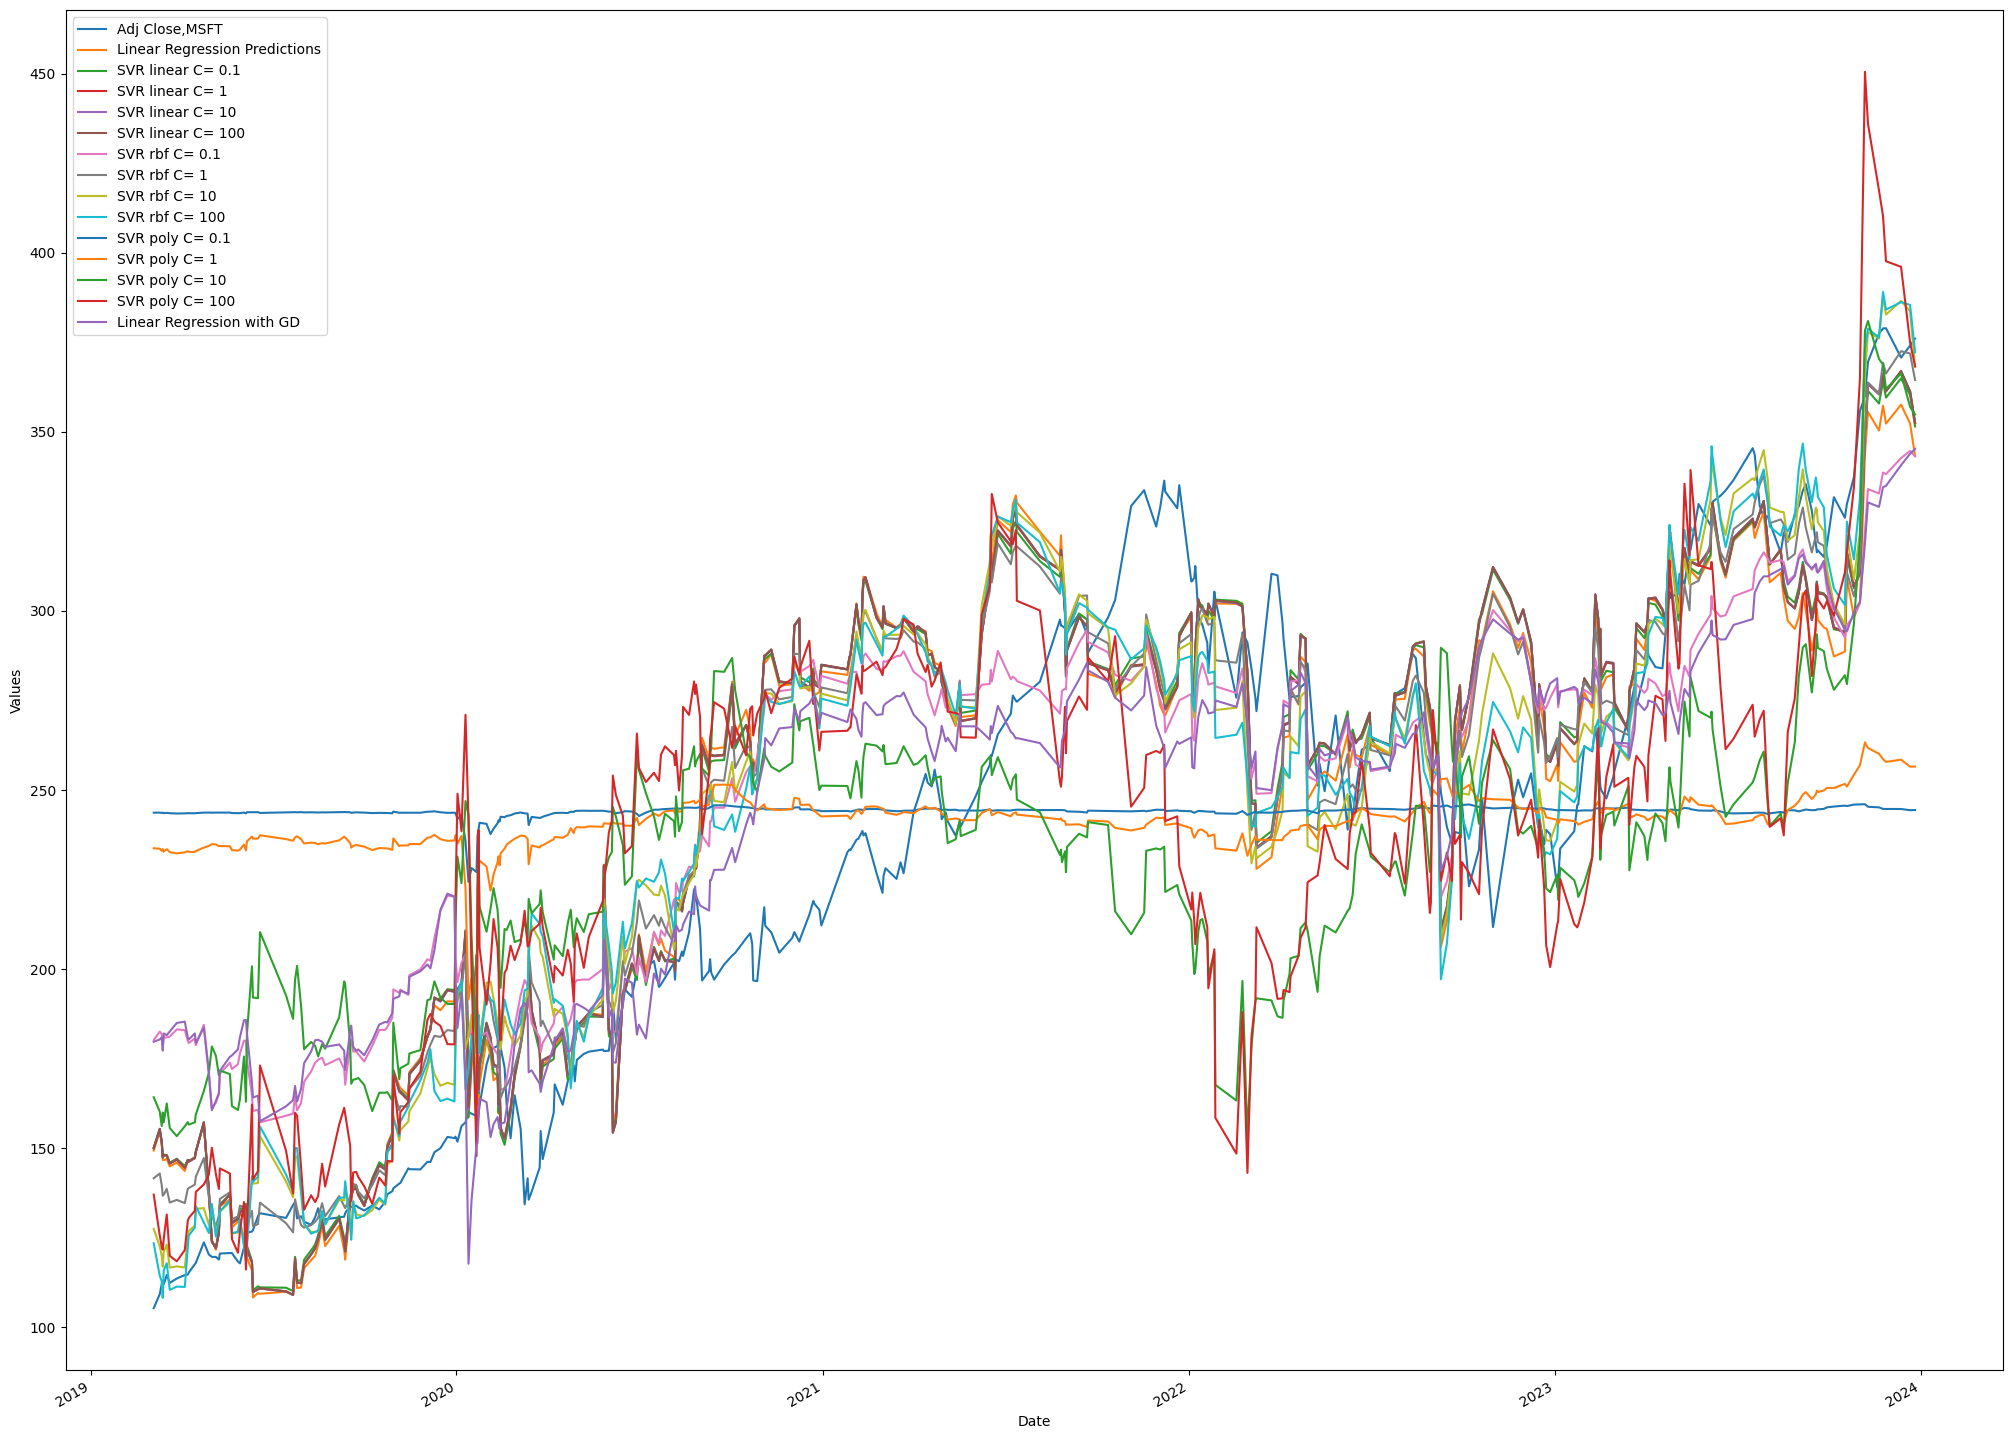

In [ ]:
# ### START CODE HERE ###
lines = df.plot.line(figsize=(25, 20))

# Set date range explicitly
# plt.xlim([pd.to_datetime('2022-05-01'), pd.to_datetime('2024-01-01')])

plt.xlabel('Date')
plt.ylabel('Values')

# ### END CODE HERE ###

### Question
1. Rank Top 3 Models with Best prediction (Best MSE)
2. What would be the reason for large error from 2023-05 to 2024-01?

In [ ]:
# 1. - SVR (kernel:rbf)
#    - Linear Regression
#    - SVR (kernel:linear)

In [ ]:
# 2. ข้อมูลในช่วงนั้นมีการเปลี่ยนค่าเพิ่มขึ้นอย่างรวดเร็วทำให้โมเดลไม่สามารถปรับ W ให้รองรับกับข้อมูลช่วงนั้นได้ทัน